# TBX5: upbm analysis

In [1]:
library(tidyverse)
library(cowplot)
library(ggrepel)
library(readxl)
library(upbm)
library(upbmAux)
theme_set(theme_bw())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuan

In [2]:
source("../../pbm_utils.r")

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘XVector’


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: RSQLite

Loading required package: parallel

Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:Biostrings’:

    pattern



Attaching package: ‘seqinr’


The following object is masked from ‘package:seqLogo’:

    consensus


The following object is masked from ‘package:Biostrings’:

    translate


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:dplyr’:

    count




In [3]:
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r * 10)
}

## variables

In [4]:
tf <- "TBX5"

motif <- "AGGTGT"
rc_motif <- "ACACCT"

ref_condition <- "TBX5-ref"

datdir <- "../../../data/internal/pbms"
sampdir <- "../../../data/internal/pbms"

## 1. load sample sheet

In [5]:
alexa_samples <- read_csv(file.path(sampdir, paste0(tf, "-alexa.csv")), col_types = cols())
alexa_samples

date,id,reuse,type,pmt,lp,idx,condition,gpr,id_idx
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
220812,420,1,Alexa,500,100,3,TBX5-ref,220812_v14_420_1_TBX5-ref_Alexa488_lp500pg100_3-8.gpr,420_3
220817,432,1,Alexa,500,100,3,TBX5-ref,220817_v14_432_1_TBX5-ref_Alexa488_lp500pg100_3-8.gpr,432_3
221026,425,1,Alexa,500,100,4,TBX5-ref,221026_v14_425_1_TBX5-ref_Alexa488_lp500pg100_4-8.gpr,425_4
221026,425,1,Alexa,500,100,5,TBX5-3,221026_v14_425_1_TBX5-3_Alexa488_lp500pg100_5-8.gpr,425_5
221026,425,1,Alexa,500,100,7,TBX5-2,221026_v14_425_1_TBX5-2_Alexa488_lp500pg100_7-8.gpr,425_7
230511,459,1,Alexa,500,100,3,TBX5-ref,230511_v14_459_1_TBX5-ref_Alexa488_lp500pg100_3-8.gpr,459_3
230511,459,1,Alexa,500,100,5,TBX5-2,230511_v14_459_1_TBX5-2_Alexa488_lp500pg100_5-8.gpr,459_5
230511,459,1,Alexa,500,100,7,TBX5-3,230511_v14_459_1_TBX5-3_Alexa488_lp500pg100_7-8.gpr,459_7


In [6]:
cy3_samples <- read_csv(file.path(sampdir, paste0(tf, "-cy3.csv")), col_types = cols())
cy3_samples

date,id,type,pmt,lp,idx,gpr,id_idx
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
220811,420,Cy3,500,100,3,220811_v14_420_doublestranded_Cy3_lp500pg100_3-8.gpr,420_3
220817,432,Cy3,500,100,3,220817_v14_432_doublestranded_Cy3_lp500pg100_3-8.gpr,432_3
221025,425,Cy3,500,100,4,221025_v14_425_doublestranded_Cy3_lp500pg100_4-8.gpr,425_4
221025,425,Cy3,500,100,5,221025_v14_425_doublestranded_Cy3_lp500pg100_5-8.gpr,425_5
221025,425,Cy3,500,100,7,221025_v14_425_doublestranded_Cy3_lp500pg100_7-8.gpr,425_7
230510,459,Cy3,500,100,3,230510_v14_459_doublestranded_Cy3_lp500pg100_3-8.gpr,459_3
230510,459,Cy3,500,100,5,230510_v14_459_doublestranded_Cy3_lp500pg100_5-8.gpr,459_5
230510,459,Cy3,500,100,7,230510_v14_459_doublestranded_Cy3_lp500pg100_7-8.gpr,459_7


In [7]:
# properly prefix file paths for data
alexa_samples <- dplyr::mutate(alexa_samples, gpr = file.path(datdir, gpr))
cy3_samples <- dplyr::mutate(cy3_samples, gpr = file.path(datdir, gpr))

## 2. load data

In [8]:
tf_a <- gpr2PBMExperiment(alexa_samples, probes = pbm_8x60k_v1)
tf_c <- gpr2PBMExperiment(cy3_samples, probes = pbm_8x60k_v1)

## 3. QC: # saturated and NA probes

In [9]:
tf_a_df <- broom::tidy(tf_a, long = TRUE) 
tf_c_df <- broom::tidy(tf_c, long = TRUE) 

In [10]:
tf_a_df %>%
    dplyr::group_by(id, condition, pmt) %>%
    dplyr::summarize(nsat = sum(log2(fore) > 15.5 |
                                log2(fore) < 4, na.rm = TRUE)) %>%
    dplyr::ungroup() %>%
    tidyr::spread(pmt, nsat) %>%
    print(n = 50)

`summarise()` has grouped output by 'id', 'condition'. You can override using
the `.groups` argument.


# A tibble: 8 × 3
     id condition `500`
  <dbl> <chr>     <int>
1   420 TBX5-ref      2
2   425 TBX5-2        4
3   425 TBX5-3       21
4   425 TBX5-ref     39
5   432 TBX5-ref      0
6   459 TBX5-2        0
7   459 TBX5-3        1
8   459 TBX5-ref      0


In [11]:
tf_a_df %>%
    dplyr::group_by(id, condition, pmt) %>%
    dplyr::summarize(nna = sum(is.na(fore))) %>%
    dplyr::ungroup() %>%
    tidyr::spread(pmt, nna) %>%
    print(n = 50)

`summarise()` has grouped output by 'id', 'condition'. You can override using
the `.groups` argument.


# A tibble: 8 × 3
     id condition `500`
  <dbl> <chr>     <int>
1   420 TBX5-ref      0
2   425 TBX5-2       27
3   425 TBX5-3        0
4   425 TBX5-ref      0
5   432 TBX5-ref      0
6   459 TBX5-2      168
7   459 TBX5-3      903
8   459 TBX5-ref    791


## 4. pre-processing

In [12]:
chosen_pmt <- 500

In [13]:
tf_a_pmt <- tf_a[, colData(tf_a)$pmt == chosen_pmt]

Warning message:
“Removed 1889 rows containing non-finite values (stat_density).”


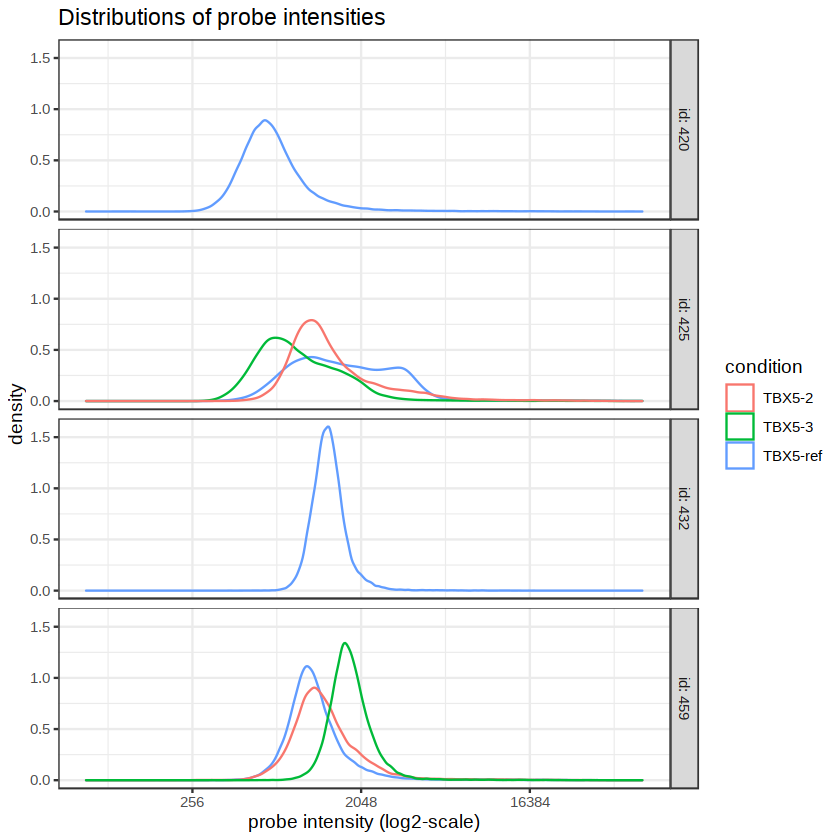

In [14]:
tf_a2 <- broom::tidy(tf_a_pmt, "fore", long = TRUE)

ggplot(tf_a2, aes(x = fore, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("probe intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of probe intensities")

## background-subtract probe intensities

In [15]:
tf_a_pmt <- backgroundSubtract(tf_a_pmt, assay = "fore", assayb = "back")
tf_c <- backgroundSubtract(tf_c, assay = "fore", assayb = "back")

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

Warning message:
“Removed 1935 rows containing non-finite values (stat_density).”


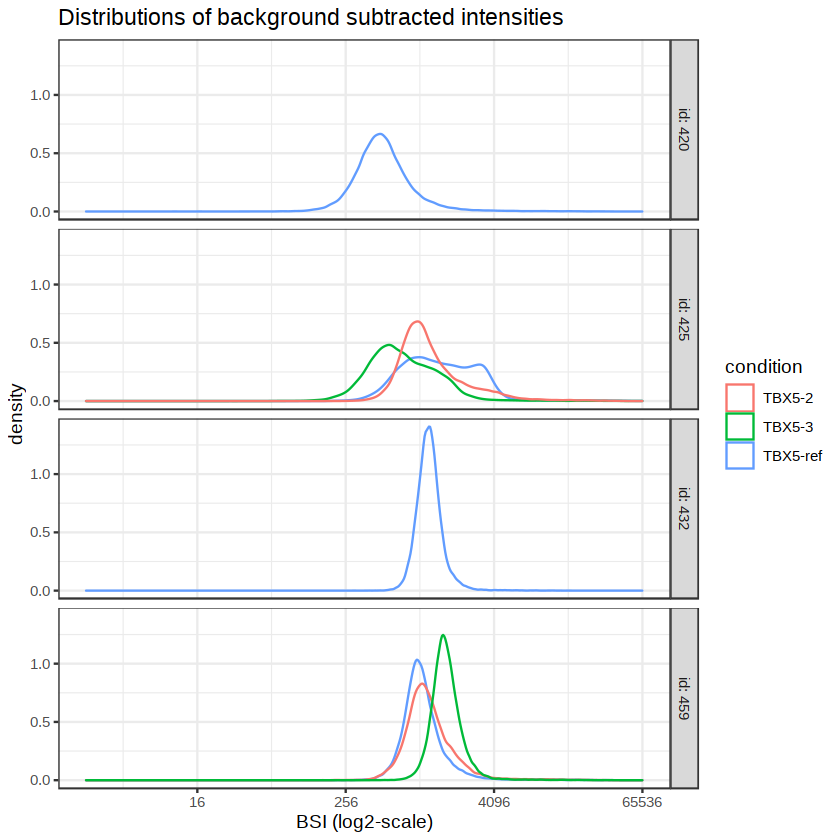

In [16]:
tf_a2 <- broom::tidy(tf_a_pmt, "fore", long = TRUE)

ggplot(tf_a2, aes(x = fore, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("BSI (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of background subtracted intensities")

## cy3 normalize

In [17]:
tf_c_e <- cy3FitEmpirical(tf_c, refcy3_8x60k_v1)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

In [18]:
tf_a_pmt <- cy3Normalize(pe = tf_a_pmt, cy3pe = tf_c_e, match_by = "id_idx")

## spatial adjustment

In [19]:
tf_a_pmt <- spatiallyAdjust(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

## normalize within replicates

In [20]:
tf_a_pmt <- normalizeWithinReplicates(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”


Warning message:
“Removed 3440 rows containing non-finite values (stat_density).”


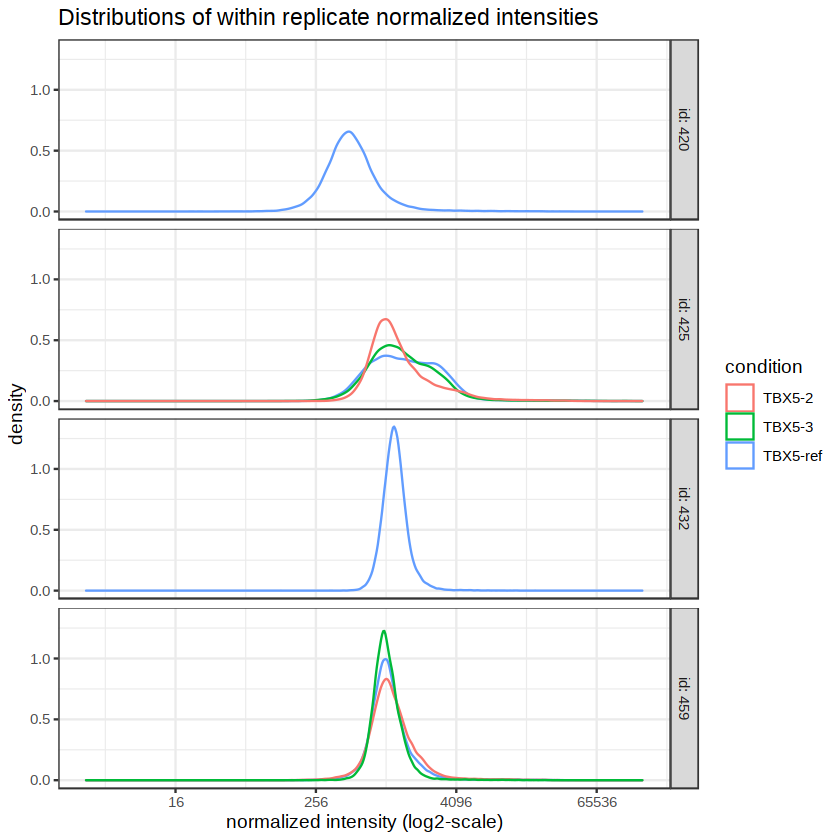

In [21]:
broom::tidy(tf_a_pmt, long = TRUE) %>%
    ggplot(aes(x = normalized, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("normalized intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of within replicate normalized intensities")

## normalize across replicates

In [22]:
tf_a_pmt <- normalizeAcrossReplicates(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”


Warning message:
“Removed 3440 rows containing non-finite values (stat_density).”


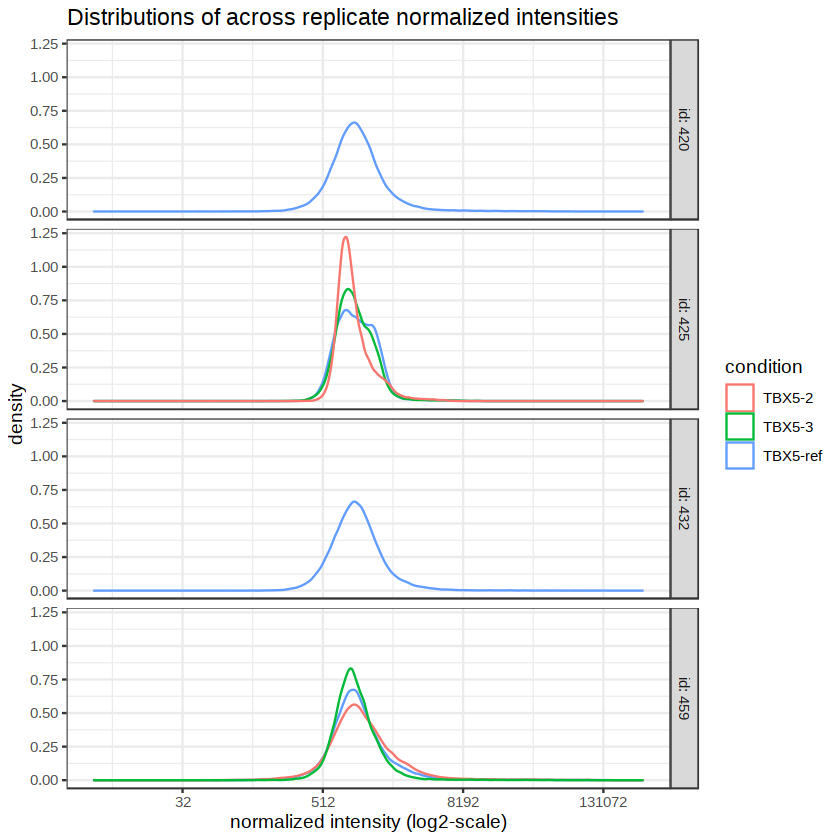

In [23]:
broom::tidy(tf_a_pmt, long = TRUE) %>%
    ggplot(aes(x = normalized, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("normalized intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of across replicate normalized intensities")

## 5. post-processing QC: check filtered probes
upbm fails if >20% filtered

In [24]:
tf_ap_df <- broom::tidy(tf_a_pmt, long = TRUE)

In [25]:
l <- length(unique(tf_ap_df$probeID))

In [26]:
tf_ap_df %>%
    dplyr::group_by(id, condition) %>%
    dplyr::summarize(nna = sum(is.na(normalized)), percent_filtered_out = 100*nna/l) %>%
    dplyr::filter(percent_filtered_out<20) %>%
    dplyr::ungroup() %>%
    print(n = 100)

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


# A tibble: 8 × 4
     id condition   nna percent_filtered_out
  <dbl> <chr>     <int>                <dbl>
1   420 TBX5-ref   1008              2.40   
2   425 TBX5-2       31              0.0739 
3   425 TBX5-3       35              0.0834 
4   425 TBX5-ref      4              0.00954
5   432 TBX5-ref      3              0.00715
6   459 TBX5-2      470              1.12   
7   459 TBX5-3      907              2.16   
8   459 TBX5-ref    982              2.34   


## 6. 8-mer summarization

In [27]:
tf_ap8 <- summarizeKmers(pe = tf_a_pmt,
                         metrics = "median")

In [28]:
tf_ap8_df <- broom::tidy(tf_ap8, long = TRUE)

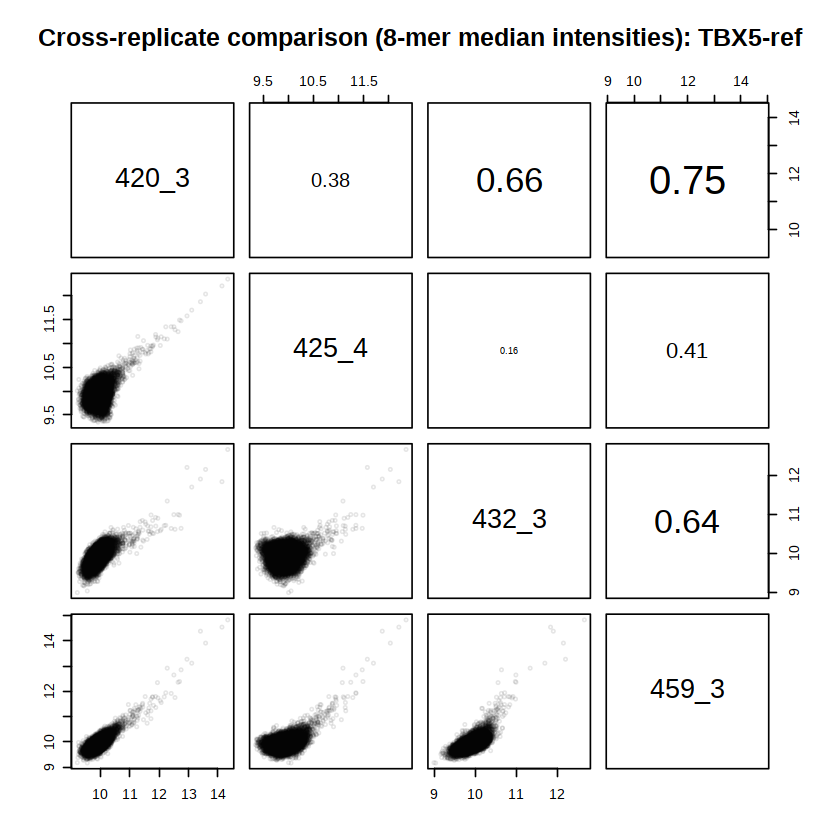

In [29]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5-ref") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): TBX5-ref")

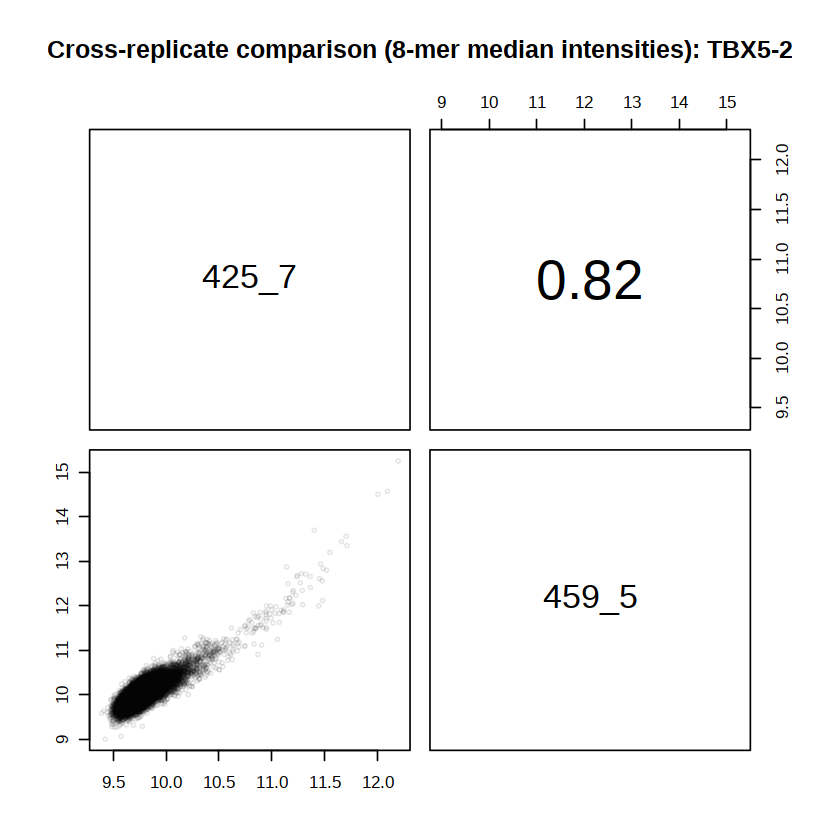

In [30]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5-2") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): TBX5-2")

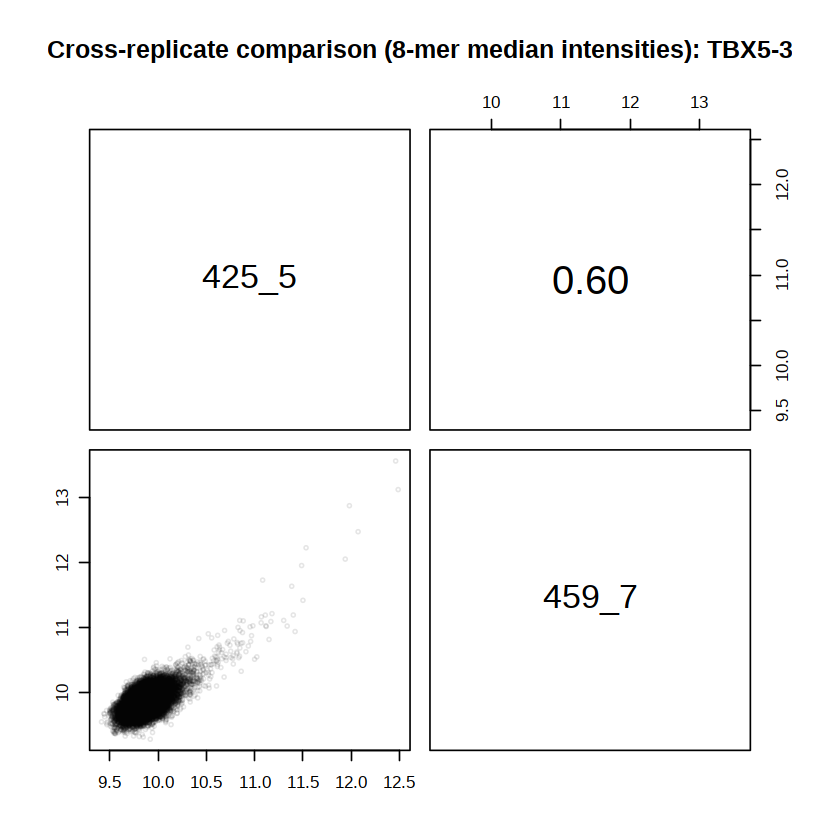

In [31]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "TBX5-3") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): TBX5-3")

## 7. inference: fit probe model

In [32]:
alexa_pfit <- probeFit(tf_a_pmt, stratify = "condition")
head(alexa_pfit)

class: PBMExperiment 
dim: 6 3 
metadata(0):
assays(3): beta sd df
rownames: NULL
rowData names(4): Column Row probeID Sequence
colnames(3): TBX5-ref TBX5-3 TBX5-2
colData names(0):
probeCols(4): Column Row probeID Sequence
probeFilter names(0): 
probeTrim: 1 36

In [33]:
pfit_dat <- broom::tidy(alexa_pfit, assay = c("beta", "sd"))
head(pfit_dat)

Column,Row,probeID,Sequence,cname,beta,sd
<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
6,1,dBr_14334_Jan07,GGTGTGAGTCCATTTCGTCAAACCAACGCAACAGGT,TBX5-ref,10.465088,0.2526282
6,1,dBr_14334_Jan07,GGTGTGAGTCCATTTCGTCAAACCAACGCAACAGGT,TBX5-3,9.939171,0.3572702
6,1,dBr_14334_Jan07,GGTGTGAGTCCATTTCGTCAAACCAACGCAACAGGT,TBX5-2,11.295894,0.5052564
7,1,dBr_06208_Jan07,CAGTCTAAGTTTTCGGATTACCATTAGAAATTGATG,TBX5-ref,9.863105,0.2015897
7,1,dBr_06208_Jan07,CAGTCTAAGTTTTCGGATTACCATTAGAAATTGATG,TBX5-3,9.130042,0.2850908
7,1,dBr_06208_Jan07,CAGTCTAAGTTTTCGGATTACCATTAGAAATTGATG,TBX5-2,9.528967,0.4031793


## 8. inference: fit 8-mer model

In [34]:
alexa_kfit <- kmerFit(alexa_pfit, kmers = uniqueKmers(8L),
                      baseline = ref_condition)
alexa_kfit

class: SummarizedExperiment 
dim: 32896 3 
metadata(1): baseline
assays(5): affinityEstimate affinityVariance contrastDifference
  contrastAverage contrastVariance
rownames: NULL
rowData names(1): seq
colnames(3): TBX5-ref TBX5-3 TBX5-2
colData names(0):

## 9. inference: test for 8-mer affinity (per protein)

In [35]:
alexa_pa <- kmerTestAffinity(alexa_kfit)
alexa_pa

class: SummarizedExperiment 
dim: 32896 3 
metadata(0):
assays(6): affinityEstimate affinityVariance ... affinityP affinityQ
rownames: NULL
rowData names(1): seq
colnames(3): TBX5-ref TBX5-3 TBX5-2
colData names(0):

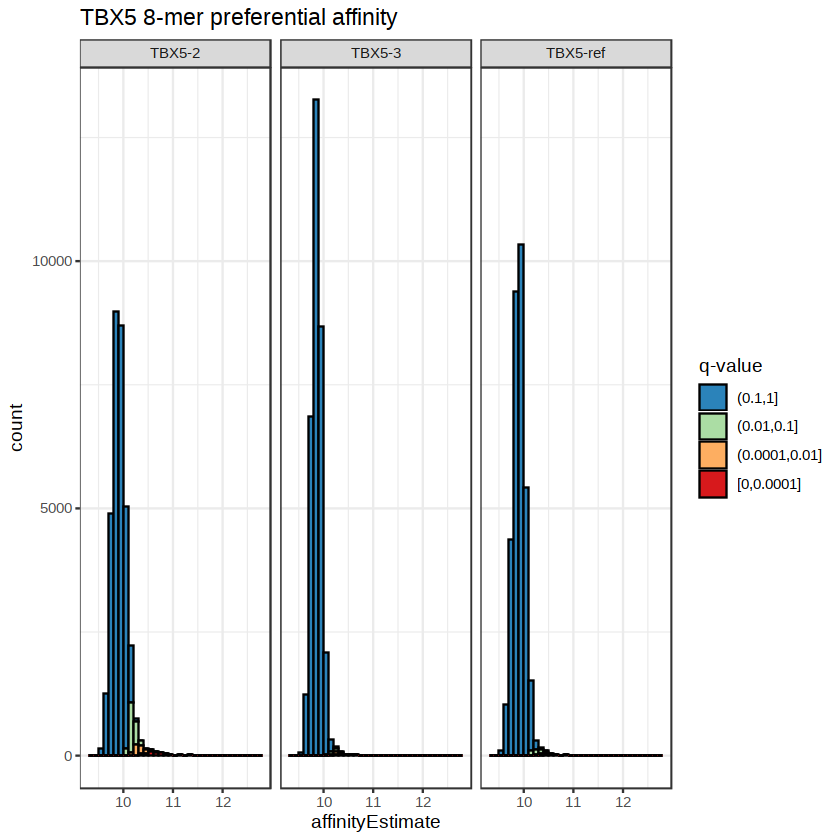

In [36]:
pa_dat <- broom::tidy(alexa_pa, c("affinityEstimate", "affinityQ"))

pa_dat %>%
    dplyr::mutate(affinityQ = cut(affinityQ, c(1e0, 1e-1, 1e-2, 1e-4, 0),
                                  include.lowest = TRUE),
                  affinityQ = factor(affinityQ, levels = rev(levels(affinityQ)))) %>%
    ggplot(aes(x = affinityEstimate, fill = affinityQ)) +
    geom_histogram(binwidth = .1, boundary = 10, color = 'black', position = "stack", alpha = 1) +
    scale_fill_brewer("q-value", palette = "Spectral", direction = -1, drop = FALSE,
                      na.value = "black") +
    theme_bw() +
    facet_wrap( ~ cname, nrow = 1) +
    ggtitle(paste(tf,"8-mer preferential affinity"))

In [37]:
kfit_dat <- broom::tidy(alexa_kfit, c("affinityEstimate", "affinityVariance", "affinityQ",
                                      "contrastDifference", "contrastAverage",
                                      "contrastVariance"))

kfit_dat <- kfit_dat %>%
    dplyr::mutate(contains_any_motif = case_when(grepl(motif, seq) | grepl(rc_motif, seq) ~ paste("*", tf, "k-mer"),
                                       !grepl(motif, seq) & !grepl(rc_motif, seq) ~ "other k-mer"))


head(kfit_dat)

seq,cname,affinityEstimate,affinityVariance,contrastDifference,contrastAverage,contrastVariance,contains_any_motif
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AAAAAAAA,TBX5-ref,10.028611,0.004803049,NA,NA,NA,other k-mer
AAAAAAAA,TBX5-3,9.931881,0.003411939,-0.096729591,9.980246,0.003536125,other k-mer
AAAAAAAA,TBX5-2,9.903240,0.006690214,-0.125370831,9.965926,0.003226624,other k-mer
AAAAAAAC,TBX5-ref,9.956585,0.001912345,NA,NA,NA,other k-mer
AAAAAAAC,TBX5-3,9.957827,0.003953165,0.001242024,9.957206,0.003823328,other k-mer
AAAAAAAC,TBX5-2,9.934673,0.007408185,-0.021912511,9.945629,0.005728191,other k-mer


## 10. inference: test for differential affinity across isoforms (per 8-mer)

In [38]:
alexa_da <- kmerTestContrast(alexa_kfit)
alexa_da

class: SummarizedExperiment 
dim: 32896 3 
metadata(0):
assays(6): contrastAverage contrastDifference ... contrastP contrastQ
rownames: NULL
rowData names(1): seq
colnames(3): TBX5-ref TBX5-3 TBX5-2
colData names(0):

In [39]:
da_dat <- broom::tidy(alexa_da, c("contrastAverage", "contrastDifference",
                                  "contrastQ"))

da_dat <- da_dat %>%
    dplyr::filter(cname != ref_condition) %>%
    dplyr::mutate(contrastQ_cut = cut(contrastQ, c(1e0, 1e-1, 1e-2, 1e-3, 0),
                                  include.lowest = TRUE),
                  contrastQ_cut = factor(contrastQ_cut, levels = rev(levels(contrastQ_cut))))

In [40]:
da_dat$contains_motif <- grepl(motif, da_dat$seq)
da_dat$contains_rc_motif <- grepl(rc_motif, da_dat$seq)
da_dat$contains_any_motif <- ifelse(da_dat$contains_motif | da_dat$contains_rc_motif, paste(tf, "k-mer"), "*other k-mer")

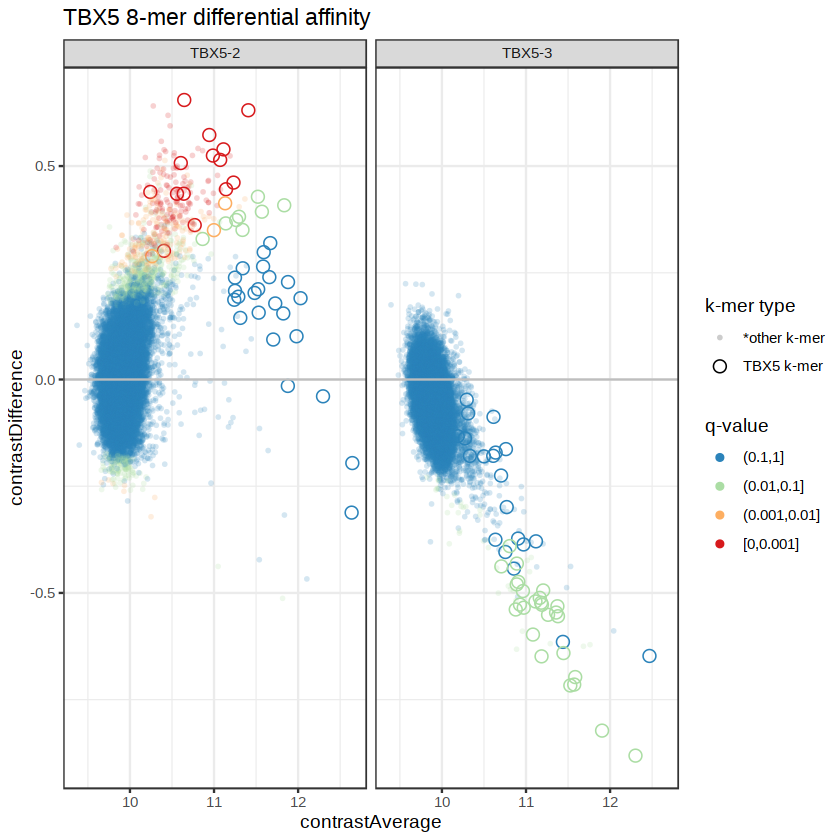

In [41]:
da_dat %>%
    ggplot(aes(x = contrastAverage, y = contrastDifference,
               color = contrastQ_cut, shape = contains_any_motif, 
               size = contains_any_motif, alpha = contains_any_motif)) +
    geom_point() +
    scale_color_brewer("q-value", palette = "Spectral", direction = -1, drop = FALSE,
                       na.value = "black") +
    scale_size_manual("k-mer type", values=c(1, 3)) +
    scale_shape_manual("k-mer type", values=c(16, 21)) +
    scale_alpha_manual("k-mer type", values=c(0.2, 1)) +
    geom_hline(color = 'gray', yintercept = 0) + 
    theme_bw() +
    guides(color = guide_legend(override.aes = list(alpha = 1))) +
    facet_grid(. ~ cname) +
    ggtitle(paste(tf, "8-mer differential affinity"))

## 11. make sequence logos

In [42]:
n_to_plot <- 50

In [43]:
pa_dat_sort <- pa_dat[order(pa_dat$affinityQ, decreasing = FALSE), ]

pa_ref <- head(pa_dat_sort[pa_dat_sort$cname == "TBX5-ref",], n_to_plot)
print(nrow(pa_ref))

pa_3 <- head(pa_dat_sort[pa_dat_sort$cname == "TBX5-3",], n_to_plot)
print(nrow(pa_3))

pa_2 <- head(pa_dat_sort[pa_dat_sort$cname == "TBX5-2",], n_to_plot)
print(nrow(pa_2))

[1] 50
[1] 50
[1] 50


In [44]:
pa_ref_pwm <- pwm_from_ordered_list(pa_ref$seq, orientation_motif="CAC")
pa_2_pwm <- pwm_from_ordered_list(pa_2$seq, orientation_motif="CAC")
pa_3_pwm <- pwm_from_ordered_list(pa_3$seq, orientation_motif="CAC")

[1] 50

Time difference of 0.13 secs
Determining distance matrix based on shared 6-mers:

Time difference of 0.05 secs

Clustering into groups by similarity:

Time difference of 0.06 secs

Aligning Sequences:

Time difference of 0.19 secs

Iteration 1 of 2:

Determining distance matrix based on alignment:

Time difference of 0.05 secs

Reclustering into groups by similarity:

Time difference of 0.09 secs

Realigning Sequences:

Time difference of 0.18 secs

Iteration 2 of 2:

Determining distance matrix based on alignment:

Time difference of 0.05 secs

Reclustering into groups by similarity:

Time difference of 0.06 secs

Realigning Sequences:

Time difference of 0.04 secs

Refining the alignment:

Time difference of 0.01 secs

[1] 50

Time difference of 0.11 secs
Determining distance matrix based on shared 6-mers:

Time difference of 0.05 secs

Clustering into groups by similarity:

Time difference of 0.06 secs

Aligning Sequences:

Time difference of 0.18 secs

Iteration 1 of 2:

De

In [45]:
options(repr.plot.width=1.5, repr.plot.height=1, repr.plot.pointsize=9)

In [46]:
pwms <- list('TBX5-1'=pa_ref_pwm, 'TBX5-2'=pa_2_pwm, 'TBX5-3'=pa_3_pwm)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


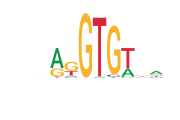

In [47]:
ggseqlogo(pwms[[1]], ncol=1) + theme(axis.text.x = element_blank(),
                                     axis.text.y = element_blank(),
                                     axis.title.y = element_blank())
ggsave("../../../figures/fig3/TBX5-ref_pbm_seqlogo.pdf", width=1.5, height=1)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


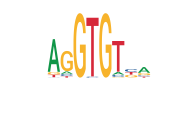

In [48]:
ggseqlogo(pwms[[2]], ncol=1) + theme(axis.text.x = element_blank(),
                                     axis.text.y = element_blank(),
                                     axis.title.y = element_blank())
ggsave("../../../figures/fig3/TBX5-2_pbm_seqlogo.pdf", width=1.5, height=1)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


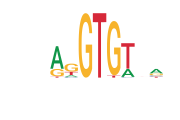

In [49]:
ggseqlogo(pwms[[3]], ncol=1) + theme(axis.text.x = element_blank(),
                                     axis.text.y = element_blank(),
                                     axis.title.y = element_blank())
ggsave("../../../figures/fig3/TBX5-3_pbm_seqlogo.pdf", width=1.5, height=1)

## 12. write files for supplement/plotting

In [50]:
write.csv(kfit_dat, file=file.path("../../../data/processed/pbms", paste0(tf, "kfit_dat.csv")), row.names=FALSE)
write.csv(da_dat, file=file.path("../../../data/processed/pbms", paste0(tf, "da_dat.csv")), row.names=FALSE)

In [51]:
## for GEO, need affinityEstimate per protein
head(pa_dat)

seq,cname,affinityEstimate,affinityQ
<chr>,<chr>,<dbl>,<dbl>
AAAAAAAA,TBX5-ref,10.028611,0.6371148
AAAAAAAA,TBX5-3,9.931881,0.7081038
AAAAAAAA,TBX5-2,9.903240,0.5503278
AAAAAAAC,TBX5-ref,9.956585,0.5869690
AAAAAAAC,TBX5-3,9.957827,0.7081038
AAAAAAAC,TBX5-2,9.934673,0.5318323


In [52]:
geo <- pa_dat %>% 
    reshape2::dcast(seq ~ cname, value.var = "affinityEstimate") %>%
    select(seq, "TBX5-ref", "TBX5-2", "TBX5-3")
head(geo)

,seq,TBX5-ref,TBX5-2,TBX5-3
,<chr>,<dbl>,<dbl>,<dbl>
1,AAAAAAAA,10.028611,9.903240,9.931881
2,AAAAAAAC,9.956585,9.934673,9.957827
3,AAAAAAAG,10.115281,10.040526,9.936246
4,AAAAAAAT,10.020661,9.994817,9.973363
5,AAAAAACA,10.005205,9.981221,9.912703
6,AAAAAACC,9.824207,9.858048,9.802591


In [53]:
write.csv(geo, file=file.path("../../../data/processed/pbms", paste0(tf, "-geo.csv")), row.names=FALSE,
          quote=FALSE)

In [54]:
## for supp, want affinity estimates + da q-value
supp_2 <- da_dat %>% 
    select(seq, cname, contrastAverage, contrastDifference, contrastQ) %>%
    filter(cname == "TBX5-2")

supp_3 <- da_dat %>% 
    select(seq, cname, contrastAverage, contrastDifference, contrastQ) %>%
    filter(cname == "TBX5-3")

supp <- full_join(geo, supp_2, by="seq") %>%
    select(seq, "TBX5-ref", "TBX5-2", "TBX5-3", contrastAverage, contrastDifference, contrastQ) %>%
    rename(contrastAverage = "contrastAverage_TBX5-2", contrastDifference = "contrastDifference_TBX5-2",
           contrastQ = "contrastQ_TBX5-2")

supp <- full_join(supp, supp_3, by="seq") %>%
    select(seq, "TBX5-ref", "TBX5-2", "TBX5-3", "contrastAverage_TBX5-2", "contrastDifference_TBX5-2", 
           "contrastQ_TBX5-2", contrastAverage, contrastDifference, contrastQ) %>%
    rename(contrastAverage = "contrastAverage_TBX5-3", contrastDifference = "contrastDifference_TBX5-3",
           contrastQ = "contrastQ_TBX5-3")

In [55]:
supp

seq,TBX5-ref,TBX5-2,TBX5-3,contrastAverage_TBX5-2,contrastDifference_TBX5-2,contrastQ_TBX5-2,contrastAverage_TBX5-3,contrastDifference_TBX5-3,contrastQ_TBX5-3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAAAAAAA,10.028611,9.903240,9.931881,9.965926,-0.1253708309,0.3166576,9.980246,-0.096729591,0.5558178
AAAAAAAC,9.956585,9.934673,9.957827,9.945629,-0.0219125113,0.9497580,9.957206,0.001242024,0.9959329
AAAAAAAG,10.115281,10.040526,9.936246,10.077904,-0.0747544310,0.7189700,10.025764,-0.179034323,0.4053485
AAAAAAAT,10.020661,9.994817,9.973363,10.007739,-0.0258430936,0.9209695,9.997012,-0.047297164,0.8054506
AAAAAACA,10.005205,9.981221,9.912703,9.993213,-0.0239836790,0.9318781,9.958954,-0.092501410,0.6248438
AAAAAACC,9.824207,9.858048,9.802591,9.841127,0.0338410883,0.8857375,9.813399,-0.021615445,0.9177553
AAAAAACG,9.921335,9.972829,9.968412,9.947082,0.0514940110,0.7842663,9.944873,0.047076953,0.7733266
AAAAAACT,9.959487,10.013316,9.881549,9.986401,0.0538291529,0.8306216,9.920518,-0.077937487,0.6596561
AAAAAAGA,10.098105,10.024965,9.974334,10.061535,-0.0731406059,0.7380815,10.036219,-0.123771638,0.5217469


In [56]:
write.table(supp, file="../../../supp/SuppTable_TBX5-PBM.txt", row.names=FALSE, quote=FALSE, sep="\t")